In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('titanic_train.csv')

In [2]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


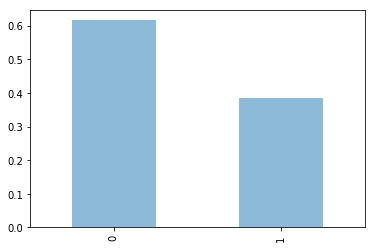

In [3]:
train_df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt. show()

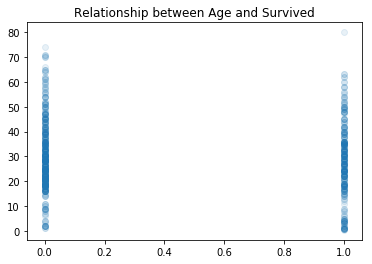

In [4]:
plt.title("Relationship between Age and Survived")
plt.scatter(train_df.Survived, train_df.Age, alpha=0.1)

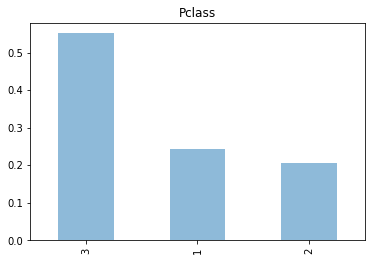

In [5]:
plt.title("Pclass")
train_df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt. show()
#1が１番良いクラス

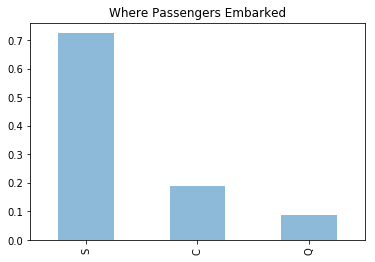

In [6]:
plt.title("Where Passengers Embarked")
train_df.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt. show()

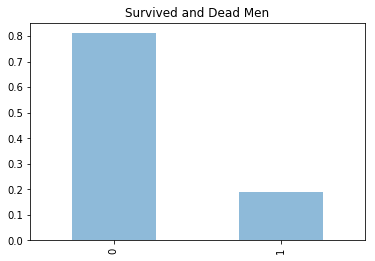

In [7]:
plt.title("Survived and Dead Men")
train_df.Survived[train_df.Sex == "male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

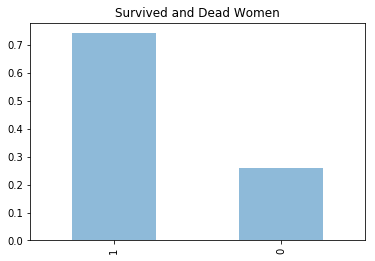

In [8]:
plt.title("Survived and Dead Women")
train_df.Survived[train_df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

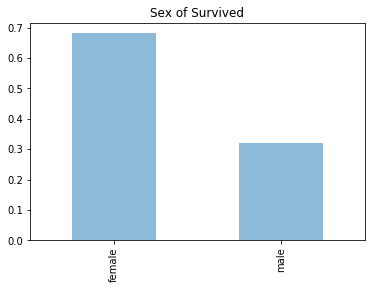

In [9]:
plt.title("Sex of Survived")
train_df.Sex[train_df.Survived == 1 ].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

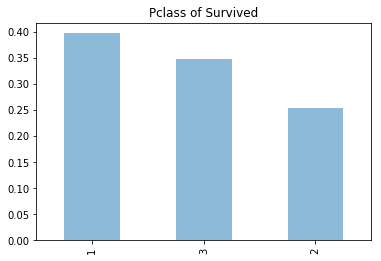

In [10]:
plt.title("Pclass of Survived")
train_df.Pclass[train_df.Survived == 1 ].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

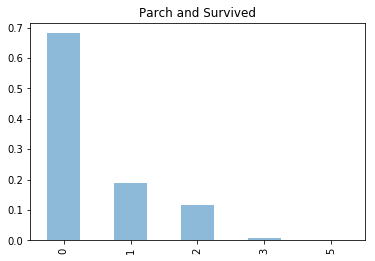

In [11]:
plt.title("Parch and Survived")
train_df.Parch[train_df.Survived == 1 ].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

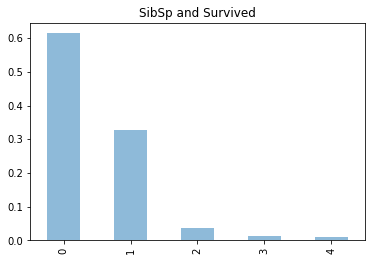

In [12]:
plt.title("SibSp and Survived")
train_df.SibSp[train_df.Survived == 1 ].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

In [13]:
class_mapping = {'S': 0, 'Q': 1, 'C': 2}
class_mapping

{'C': 2, 'Q': 1, 'S': 0}

In [14]:
train_df['Embarked'] = train_df['Embarked'].map(class_mapping)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,2.0


In [15]:
class_mapping = {'male': 0, 'female': 1,}
class_mapping

{'female': 1, 'male': 0}

In [16]:
train_df['Sex'] = train_df['Sex'].map(class_mapping)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2.0


In [17]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,0.0
1,1,1,1,38.0,1,71.2833,2.0
2,1,3,1,26.0,0,7.9250,0.0
3,1,1,1,35.0,1,53.1000,0.0
4,0,3,0,35.0,0,8.0500,0.0
5,0,3,0,NaN,0,8.4583,1.0
6,0,1,0,54.0,0,51.8625,0.0
7,0,3,0,2.0,3,21.0750,0.0
8,1,3,1,27.0,0,11.1333,0.0
9,1,2,1,14.0,1,30.0708,2.0


In [18]:
train_df["Age"].fillna(train_df.Age.mean(), inplace=True)

In [19]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.000000,1,7.2500,0.0
1,1,1,1,38.000000,1,71.2833,2.0
2,1,3,1,26.000000,0,7.9250,0.0
3,1,1,1,35.000000,1,53.1000,0.0
4,0,3,0,35.000000,0,8.0500,0.0
5,0,3,0,29.699118,0,8.4583,1.0
6,0,1,0,54.000000,0,51.8625,0.0
7,0,3,0,2.000000,3,21.0750,0.0
8,1,3,1,27.000000,0,11.1333,0.0
9,1,2,1,14.000000,1,30.0708,2.0


In [20]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    2
dtype: int64

In [21]:
train_df["Embarked"].fillna(train_df.Embarked.mean(), inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.000000,1,7.2500,0.0
1,1,1,1,38.000000,1,71.2833,2.0
2,1,3,1,26.000000,0,7.9250,0.0
3,1,1,1,35.000000,1,53.1000,0.0
4,0,3,0,35.000000,0,8.0500,0.0
5,0,3,0,29.699118,0,8.4583,1.0
6,0,1,0,54.000000,0,51.8625,0.0
7,0,3,0,2.000000,3,21.0750,0.0
8,1,3,1,27.000000,0,11.1333,0.0
9,1,2,1,14.000000,1,30.0708,2.0


In [23]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

In [24]:
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rfc_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
print('train accuracy: %.3f' % rfc_1.score(X_train, y_train))

train accuracy: 0.965
